In [45]:
import os
import imageio
import numpy as np
import h5py
import json
import matplotlib
import matplotlib.pyplot as plt
PROJECT_PATH = os.path.dirname(os.getcwd())

# Create h5 data file
In this notebook we will be loading the data created with Blender. The data created by blender consists of .png images stored in a certain path together with the .json  and saving it into an hp5 file in the form (object_id, color, view, height, width, channel)

In [69]:
RESOLUTION = 256
NUM_VIEWS = 14


num_selected_category = 0
num_selected_data_type = 1


available_categories = ["Shape", "Culture"]
available_data_type = ["train", "test"]
selected_category = available_categories[num_selected_category]
selected_data_type = available_data_type[num_selected_data_type]


dataset_path = "D:/dataset"+selected_category
renders_path = os.path.join(dataset_path, selected_data_type+"_renders")

identifiers_path = os.path.join(dataset_path, selected_data_type+"_"+"object_dictionary")
    
h5_savepath = os.path.join(PROJECT_PATH, "data", "shrec2021")



In [70]:
with open(os.path.join(identifiers_path,'data.json')) as json_file:
    identifiers = json.load(json_file)

In [71]:
img_model_ids = np.array([int(image_filename.split("_")[0]) for image_filename in os.listdir(renders_path)])
img_viewnum = np.array([int(image_filename.split("_")[-1].split(".")[0]) for image_filename in os.listdir(renders_path)])

In [72]:
np.unique(img_viewnum)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [73]:
model_ids = identifiers.keys()

# Initialize the array in which data is saved
factors_shape = [len(identifiers.keys()), NUM_VIEWS]
image_shape = [RESOLUTION, RESOLUTION, 3]
images_shape = factors_shape + image_shape

# Data 
images = np.zeros(images_shape,dtype= np.uint8)
images_object_id = np.zeros(factors_shape, dtype = int)
images_filenames = np.zeros(factors_shape, dtype = "S10")
images_classes_int = np.zeros(factors_shape, dtype = int)
images_views_int = np.zeros(factors_shape, dtype = int)
images_classes_str = np.zeros(factors_shape, dtype = "S10")
images_object_dimensions = np.zeros(factors_shape+[3])

# Loop through all the factors
for num_id, model_id in enumerate(model_ids):
    print(type(model_id))
    print("Loading object {} with id {}".format(num_id,model_id))
    for view in range(NUM_VIEWS):
        print("Loading view number {} ".format(view))
        image_filename = str(model_id)+"_"+str(view)+".png"
        
        # Store the read image into array
        images_filenames[num_id, view] = image_filename
        images[num_id, view, ...] = imageio.imread(os.path.join(renders_path, image_filename))[:,:,:3]
        images_views_int[num_id, view] = view 
        images_object_id[num_id, view] = model_id
        if selected_data_type=="train":
            images_classes_int[num_id, view] = identifiers[str(model_id)]["num_class"]
            images_classes_str[num_id, view,...] = identifiers[str(model_id)]["class"]
        for dimension_num in range(3):
            images_object_dimensions[num_id, view, dimension_num] = identifiers[model_id]["d"+str(dimension_num+1)]

<class 'str'>
Loading object 0 with id 0
Loading view number 0 
Loading view number 1 
Loading view number 2 
Loading view number 3 
Loading view number 4 
Loading view number 5 
Loading view number 6 
Loading view number 7 
Loading view number 8 
Loading view number 9 
Loading view number 10 
Loading view number 11 
Loading view number 12 
Loading view number 13 
<class 'str'>
Loading object 1 with id 1
Loading view number 0 
Loading view number 1 
Loading view number 2 
Loading view number 3 
Loading view number 4 
Loading view number 5 
Loading view number 6 
Loading view number 7 
Loading view number 8 
Loading view number 9 
Loading view number 10 
Loading view number 11 
Loading view number 12 
Loading view number 13 
<class 'str'>
Loading object 2 with id 2
Loading view number 0 
Loading view number 1 
Loading view number 2 
Loading view number 3 
Loading view number 4 
Loading view number 5 
Loading view number 6 
Loading view number 7 
Loading view number 8 
Loading view numbe

Loading view number 3 
Loading view number 4 
Loading view number 5 
Loading view number 6 
Loading view number 7 
Loading view number 8 
Loading view number 9 
Loading view number 10 
Loading view number 11 
Loading view number 12 
Loading view number 13 
<class 'str'>
Loading object 23 with id 23
Loading view number 0 
Loading view number 1 
Loading view number 2 
Loading view number 3 
Loading view number 4 
Loading view number 5 
Loading view number 6 
Loading view number 7 
Loading view number 8 
Loading view number 9 
Loading view number 10 
Loading view number 11 
Loading view number 12 
Loading view number 13 
<class 'str'>
Loading object 24 with id 24
Loading view number 0 
Loading view number 1 
Loading view number 2 
Loading view number 3 
Loading view number 4 
Loading view number 5 
Loading view number 6 
Loading view number 7 
Loading view number 8 
Loading view number 9 
Loading view number 10 
Loading view number 11 
Loading view number 12 
Loading view number 13 
<clas

Loading view number 4 
Loading view number 5 
Loading view number 6 
Loading view number 7 
Loading view number 8 
Loading view number 9 
Loading view number 10 
Loading view number 11 
Loading view number 12 
Loading view number 13 
<class 'str'>
Loading object 46 with id 46
Loading view number 0 
Loading view number 1 
Loading view number 2 
Loading view number 3 
Loading view number 4 
Loading view number 5 
Loading view number 6 
Loading view number 7 
Loading view number 8 
Loading view number 9 
Loading view number 10 
Loading view number 11 
Loading view number 12 
Loading view number 13 
<class 'str'>
Loading object 47 with id 47
Loading view number 0 
Loading view number 1 
Loading view number 2 
Loading view number 3 
Loading view number 4 
Loading view number 5 
Loading view number 6 
Loading view number 7 
Loading view number 8 
Loading view number 9 
Loading view number 10 
Loading view number 11 
Loading view number 12 
Loading view number 13 
<class 'str'>
Loading object

Loading view number 12 
Loading view number 13 
<class 'str'>
Loading object 68 with id 68
Loading view number 0 
Loading view number 1 
Loading view number 2 
Loading view number 3 
Loading view number 4 
Loading view number 5 
Loading view number 6 
Loading view number 7 
Loading view number 8 
Loading view number 9 
Loading view number 10 
Loading view number 11 
Loading view number 12 
Loading view number 13 
<class 'str'>
Loading object 69 with id 69
Loading view number 0 
Loading view number 1 
Loading view number 2 
Loading view number 3 
Loading view number 4 
Loading view number 5 
Loading view number 6 
Loading view number 7 
Loading view number 8 
Loading view number 9 
Loading view number 10 
Loading view number 11 
Loading view number 12 
Loading view number 13 
<class 'str'>
Loading object 70 with id 70
Loading view number 0 
Loading view number 1 
Loading view number 2 
Loading view number 3 
Loading view number 4 
Loading view number 5 
Loading view number 6 
Loading vi

Loading view number 2 
Loading view number 3 
Loading view number 4 
Loading view number 5 
Loading view number 6 
Loading view number 7 
Loading view number 8 
Loading view number 9 
Loading view number 10 
Loading view number 11 
Loading view number 12 
Loading view number 13 
<class 'str'>
Loading object 92 with id 92
Loading view number 0 
Loading view number 1 
Loading view number 2 
Loading view number 3 
Loading view number 4 
Loading view number 5 
Loading view number 6 
Loading view number 7 
Loading view number 8 
Loading view number 9 
Loading view number 10 
Loading view number 11 
Loading view number 12 
Loading view number 13 
<class 'str'>
Loading object 93 with id 93
Loading view number 0 
Loading view number 1 
Loading view number 2 
Loading view number 3 
Loading view number 4 
Loading view number 5 
Loading view number 6 
Loading view number 7 
Loading view number 8 
Loading view number 9 
Loading view number 10 
Loading view number 11 
Loading view number 12 
Loadin

Loading view number 9 
Loading view number 10 
Loading view number 11 
Loading view number 12 
Loading view number 13 
<class 'str'>
Loading object 115 with id 115
Loading view number 0 
Loading view number 1 
Loading view number 2 
Loading view number 3 
Loading view number 4 
Loading view number 5 
Loading view number 6 
Loading view number 7 
Loading view number 8 
Loading view number 9 
Loading view number 10 
Loading view number 11 
Loading view number 12 
Loading view number 13 
<class 'str'>
Loading object 116 with id 116
Loading view number 0 
Loading view number 1 
Loading view number 2 
Loading view number 3 
Loading view number 4 
Loading view number 5 
Loading view number 6 
Loading view number 7 
Loading view number 8 
Loading view number 9 
Loading view number 10 
Loading view number 11 
Loading view number 12 
Loading view number 13 
<class 'str'>
Loading object 117 with id 117
Loading view number 0 
Loading view number 1 
Loading view number 2 
Loading view number 3 
Lo

Loading view number 4 
Loading view number 5 
Loading view number 6 
Loading view number 7 
Loading view number 8 
Loading view number 9 
Loading view number 10 
Loading view number 11 
Loading view number 12 
Loading view number 13 
<class 'str'>
Loading object 138 with id 138
Loading view number 0 
Loading view number 1 
Loading view number 2 
Loading view number 3 
Loading view number 4 
Loading view number 5 
Loading view number 6 
Loading view number 7 
Loading view number 8 
Loading view number 9 
Loading view number 10 
Loading view number 11 
Loading view number 12 
Loading view number 13 
<class 'str'>
Loading object 139 with id 139
Loading view number 0 
Loading view number 1 
Loading view number 2 
Loading view number 3 
Loading view number 4 
Loading view number 5 
Loading view number 6 
Loading view number 7 
Loading view number 8 
Loading view number 9 
Loading view number 10 
Loading view number 11 
Loading view number 12 
Loading view number 13 
<class 'str'>
Loading ob

Loading view number 10 
Loading view number 11 
Loading view number 12 
Loading view number 13 
<class 'str'>
Loading object 160 with id 160
Loading view number 0 
Loading view number 1 
Loading view number 2 
Loading view number 3 
Loading view number 4 
Loading view number 5 
Loading view number 6 
Loading view number 7 
Loading view number 8 
Loading view number 9 
Loading view number 10 
Loading view number 11 
Loading view number 12 
Loading view number 13 
<class 'str'>
Loading object 161 with id 161
Loading view number 0 
Loading view number 1 
Loading view number 2 
Loading view number 3 
Loading view number 4 
Loading view number 5 
Loading view number 6 
Loading view number 7 
Loading view number 8 
Loading view number 9 
Loading view number 10 
Loading view number 11 
Loading view number 12 
Loading view number 13 
<class 'str'>
Loading object 162 with id 162
Loading view number 0 
Loading view number 1 
Loading view number 2 
Loading view number 3 
Loading view number 4 
Lo

Loading view number 4 
Loading view number 5 
Loading view number 6 
Loading view number 7 
Loading view number 8 
Loading view number 9 
Loading view number 10 
Loading view number 11 
Loading view number 12 
Loading view number 13 
<class 'str'>
Loading object 184 with id 184
Loading view number 0 
Loading view number 1 
Loading view number 2 
Loading view number 3 
Loading view number 4 
Loading view number 5 
Loading view number 6 
Loading view number 7 
Loading view number 8 
Loading view number 9 
Loading view number 10 
Loading view number 11 
Loading view number 12 
Loading view number 13 
<class 'str'>
Loading object 185 with id 185
Loading view number 0 
Loading view number 1 
Loading view number 2 
Loading view number 3 
Loading view number 4 
Loading view number 5 
Loading view number 6 
Loading view number 7 
Loading view number 8 
Loading view number 9 
Loading view number 10 
Loading view number 11 
Loading view number 12 
Loading view number 13 
<class 'str'>
Loading ob

Loading view number 10 
Loading view number 11 
Loading view number 12 
Loading view number 13 
<class 'str'>
Loading object 207 with id 207
Loading view number 0 
Loading view number 1 
Loading view number 2 
Loading view number 3 
Loading view number 4 
Loading view number 5 
Loading view number 6 
Loading view number 7 
Loading view number 8 
Loading view number 9 
Loading view number 10 
Loading view number 11 
Loading view number 12 
Loading view number 13 
<class 'str'>
Loading object 208 with id 208
Loading view number 0 
Loading view number 1 
Loading view number 2 
Loading view number 3 
Loading view number 4 
Loading view number 5 
Loading view number 6 
Loading view number 7 
Loading view number 8 
Loading view number 9 
Loading view number 10 
Loading view number 11 
Loading view number 12 
Loading view number 13 
<class 'str'>
Loading object 209 with id 209
Loading view number 0 
Loading view number 1 
Loading view number 2 
Loading view number 3 
Loading view number 4 
Lo

Loading view number 7 
Loading view number 8 
Loading view number 9 
Loading view number 10 
Loading view number 11 
Loading view number 12 
Loading view number 13 
<class 'str'>
Loading object 230 with id 230
Loading view number 0 
Loading view number 1 
Loading view number 2 
Loading view number 3 
Loading view number 4 
Loading view number 5 
Loading view number 6 
Loading view number 7 
Loading view number 8 
Loading view number 9 
Loading view number 10 
Loading view number 11 
Loading view number 12 
Loading view number 13 
<class 'str'>
Loading object 231 with id 231
Loading view number 0 
Loading view number 1 
Loading view number 2 
Loading view number 3 
Loading view number 4 
Loading view number 5 
Loading view number 6 
Loading view number 7 
Loading view number 8 
Loading view number 9 
Loading view number 10 
Loading view number 11 
Loading view number 12 
Loading view number 13 
<class 'str'>
Loading object 232 with id 232
Loading view number 0 
Loading view number 1 
Lo

Loading view number 4 
Loading view number 5 
Loading view number 6 
Loading view number 7 
Loading view number 8 
Loading view number 9 
Loading view number 10 
Loading view number 11 
Loading view number 12 
Loading view number 13 
<class 'str'>
Loading object 253 with id 253
Loading view number 0 
Loading view number 1 
Loading view number 2 
Loading view number 3 
Loading view number 4 
Loading view number 5 
Loading view number 6 
Loading view number 7 
Loading view number 8 
Loading view number 9 
Loading view number 10 
Loading view number 11 
Loading view number 12 
Loading view number 13 
<class 'str'>
Loading object 254 with id 254
Loading view number 0 
Loading view number 1 
Loading view number 2 
Loading view number 3 
Loading view number 4 
Loading view number 5 
Loading view number 6 
Loading view number 7 
Loading view number 8 
Loading view number 9 
Loading view number 10 
Loading view number 11 
Loading view number 12 
Loading view number 13 
<class 'str'>
Loading ob

Loading view number 1 
Loading view number 2 
Loading view number 3 
Loading view number 4 
Loading view number 5 
Loading view number 6 
Loading view number 7 
Loading view number 8 
Loading view number 9 
Loading view number 10 
Loading view number 11 
Loading view number 12 
Loading view number 13 
<class 'str'>
Loading object 276 with id 276
Loading view number 0 
Loading view number 1 
Loading view number 2 
Loading view number 3 
Loading view number 4 
Loading view number 5 
Loading view number 6 
Loading view number 7 
Loading view number 8 
Loading view number 9 
Loading view number 10 
Loading view number 11 
Loading view number 12 
Loading view number 13 


In [74]:
identifiers[str(model_id)]["num_class"]

[]

In [75]:
images.shape

(277, 14, 256, 256, 3)

In [76]:
identifiers[str(model_id)]["class"]

[]

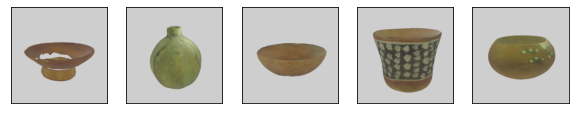

In [77]:
fig, axes = plt.subplots(1,5, figsize = (10,5))
for num_ax, ax in enumerate(axes):
    ax.imshow(images[num_ax,1])
    ax.set_xticks([])
    ax.set_yticks([])

In [78]:
print(np.unique(images_classes_int))
print(np.unique(images_filenames))
print(np.unique(images_views_int))
print(np.unique(images_classes_str))
print(np.unique(images_object_dimensions))
print(np.unique(images_object_id))

[0]
[b'0_0.png' b'0_1.png' b'0_10.png' ... b'9_7.png' b'9_8.png' b'9_9.png']
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
[b'']
[ 15.90575981  16.7573204   16.78660965  17.57670975  17.83496094
  17.90084076  18.20557022  18.2448101   19.56768036  20.09825897
  20.81391907  21.79130936  22.32855034  22.50230026  24.95170975
  25.23077965  27.0855999   27.25519943  27.27437973  28.41799927
  28.91870117  29.16530037  29.68540001  30.40340042  30.57719994
  30.59719849  30.73001099  30.81229973  30.86709976  31.11940002
  31.52539825  31.86590195  31.9090004   32.30630112  32.6364975
  33.48479843  34.16880035  35.22460175  35.34989929  36.36009979
  36.58940125  36.97919846  38.21469879  38.5041008   38.62720108
  38.66009903  38.80259705  39.08100128  39.22579956  39.35189819
  39.36750031  39.53210068  39.79109955  39.89759827  40.33049774
  40.89530182  40.90100098  41.17169952  41.2378006   41.25239944
  41.29249954  41.51539993  41.63069916  41.84860229  42.2458992
  42.26599884  42

In [79]:
# Save in an h5 file. 
dataset_filename = selected_category+"_"+selected_data_type+".h5"
print(dataset_filename)
with h5py.File(os.path.join(h5_savepath,dataset_filename),'w') as g:
    g.create_dataset('images',data=images,dtype=np.uint8)
    g.create_dataset('filenames',data=images_filenames,dtype="S10")
    g.create_dataset('dimensions',data=images_object_dimensions,dtype=float)
    g.create_dataset('class_int',data=images_classes_int,dtype=int)
    g.create_dataset('class_str',data=images_classes_str,dtype="S10")
    g.create_dataset('views',data=images_views_int,dtype=int)
    g.create_dataset('ids',data=images_object_id,dtype=int)

Shape_test.h5


In [81]:
with h5py.File(os.path.join(h5_savepath,dataset_filename),'r') as f:
    print(f.keys())
    for key in f.keys():
        print(key)
        print(np.unique(np.array(f.get(key))))
#     h5_images = np.array(f.get("images"))
#     h5_images = np.array(f.get("images"))
#     h5_images = np.array(f.get("images"))
#     h5_images = np.array(f.get("images"))
#     h5_images = np.array(f.get("images"))
    
    

<KeysViewHDF5 ['class_int', 'class_str', 'dimensions', 'filenames', 'ids', 'images', 'views']>
class_int
[0]
class_str
[b'']
dimensions
[ 15.90575981  16.7573204   16.78660965  17.57670975  17.83496094
  17.90084076  18.20557022  18.2448101   19.56768036  20.09825897
  20.81391907  21.79130936  22.32855034  22.50230026  24.95170975
  25.23077965  27.0855999   27.25519943  27.27437973  28.41799927
  28.91870117  29.16530037  29.68540001  30.40340042  30.57719994
  30.59719849  30.73001099  30.81229973  30.86709976  31.11940002
  31.52539825  31.86590195  31.9090004   32.30630112  32.6364975
  33.48479843  34.16880035  35.22460175  35.34989929  36.36009979
  36.58940125  36.97919846  38.21469879  38.5041008   38.62720108
  38.66009903  38.80259705  39.08100128  39.22579956  39.35189819
  39.36750031  39.53210068  39.79109955  39.89759827  40.33049774
  40.89530182  40.90100098  41.17169952  41.2378006   41.25239944
  41.29249954  41.51539993  41.63069916  41.84860229  42.2458992
  42.265

[ 45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62
  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80
  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98
  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116
 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134
 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152
 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170
 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188
 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206
 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224
 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242
 243 244 245 246 247 248 249 250 251 252 253 254 255]
views
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]


In [1]:
import os
import sys
PROJECT_PATH = os.path.dirname(os.getcwd())
sys.path.append(PROJECT_PATH)
from data.data_loader import load_factor_data

In [2]:
dataset = load_factor_data(data= "shrec2021", root_path = PROJECT_PATH, challenge = "Shape", data_type = "train")

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24